Incomplete

In [ ]:
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
from nltk.corpus import wordnet
nltk.download('wordnet')
import re
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Yigi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [23]:
# Load train.csv
train_data = pd.read_csv("train.csv")

# Display the first few rows to understand the structure
train_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\r\nWhy the edits made under my use...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\r\nMore\r\nI can't make any real suggestions...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [24]:
# Basic Info
print("Dataset Info:")
print(train_data.info())
print("\nSample Data:")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None

Sample Data:


In [25]:
# Label Distribution
label_cols = ["toxic", "insult", "obscene", "threat", "identity_hate"]  # Update with your label columns
label_counts = train_data[label_cols].sum()
print("\nLabel Distribution:")
print(label_counts)


Label Distribution:
toxic            15294
insult            7877
obscene           8449
threat             478
identity_hate     1405
dtype: int64


In [26]:
def preprocess_text_eda(text):
    """
    A simple preprocessing function for EDA.
    Retains as much context as possible while cleaning noise.
    """
    # Convert to lowercase to make analysis case-insensitive
    text = text.lower()

    # Replace URLs with a placeholder
    text = re.sub(r"http\S+|www\S+|https\S+", "<URL>", text, flags=re.MULTILINE)

    # Replace user mentions (e.g., @username) with a placeholder
    text = re.sub(r"@\w+", "<USER>", text)

    # Replace hashtags (#topic) with the word itself
    text = re.sub(r"#(\w+)", r"\1", text)

    # Remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    return text



In [27]:
# Preprocess the data for EDA
train_data['cleaned_comment'] = train_data['comment_text'].apply(preprocess_text_eda)
print(train_data[['comment_text', 'cleaned_comment']].head())


                                        comment_text  \
0  Explanation\r\nWhy the edits made under my use...   
1  D'aww! He matches this background colour I'm s...   
2  Hey man, I'm really not trying to edit war. It...   
3  "\r\nMore\r\nI can't make any real suggestions...   
4  You, sir, are my hero. Any chance you remember...   

                                     cleaned_comment  
0  explanation why the edits made under my userna...  
1  d'aww! he matches this background colour i'm s...  
2  hey man, i'm really not trying to edit war. it...  
3  " more i can't make any real suggestions on im...  
4  you, sir, are my hero. any chance you remember...  


In [28]:
# Original vs. cleaned comment lengths
train_data['original_length'] = train_data['comment_text'].apply(len)
train_data['cleaned_length'] = train_data['cleaned_comment'].apply(len)

print(train_data[['original_length', 'cleaned_length']].describe())

       original_length  cleaned_length
count    159571.000000   159571.000000
mean        396.593961      387.871242
std         594.387869      582.362872
min           6.000000        5.000000
25%          97.000000       93.000000
50%         207.000000      201.000000
75%         438.000000      429.000000
max        5000.000000     5000.000000


In [29]:
# Dataset overview
print(train_data.info())

# Distribution of comment lengths
train_data['cleaned_length'] = train_data['cleaned_comment'].apply(len)
train_data['word_count'] = train_data['cleaned_comment'].apply(lambda x: len(x.split()))
print("\nSummary of cleaned comment lengths:")
print(train_data['cleaned_length'].describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   id               159571 non-null  object
 1   comment_text     159571 non-null  object
 2   toxic            159571 non-null  int64 
 3   severe_toxic     159571 non-null  int64 
 4   obscene          159571 non-null  int64 
 5   threat           159571 non-null  int64 
 6   insult           159571 non-null  int64 
 7   identity_hate    159571 non-null  int64 
 8   cleaned_comment  159571 non-null  object
 9   original_length  159571 non-null  int64 
 10  cleaned_length   159571 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 13.4+ MB
None

Summary of cleaned comment lengths:
count    159571.000000
mean        387.871242
std         582.362872
min           5.000000
25%          93.000000
50%         201.000000
75%         429.000000
max        5000.000000
Name: cleaned_

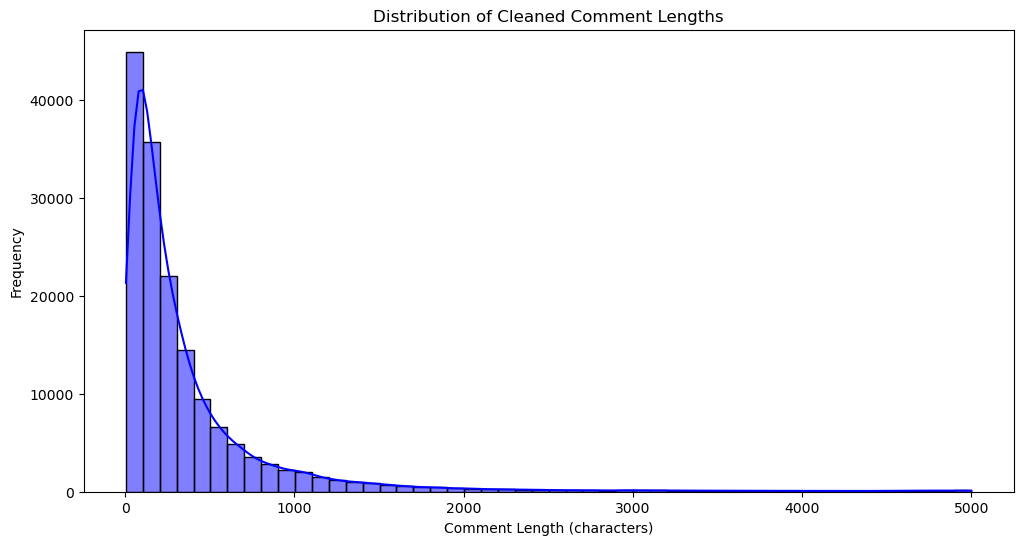

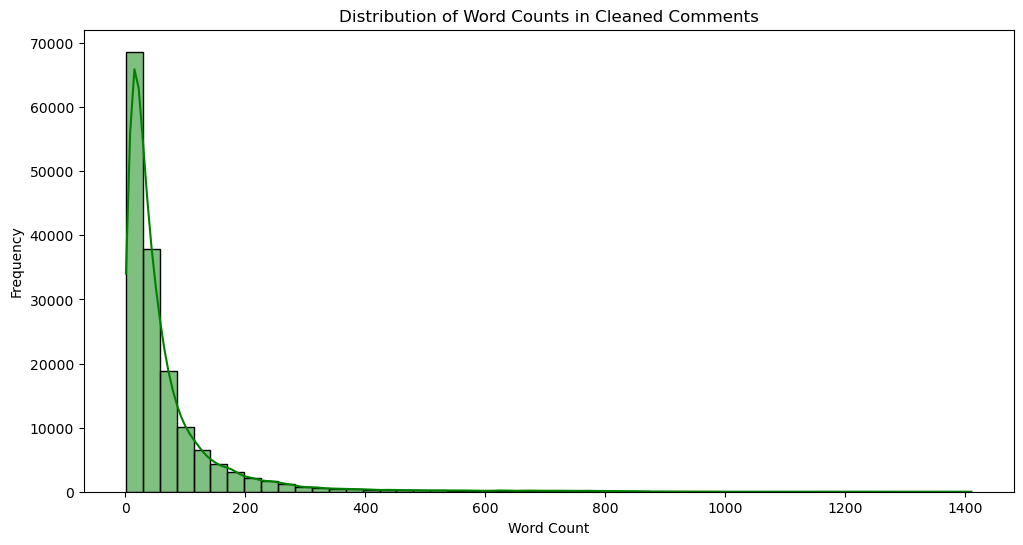

In [30]:
# Distribution of comment lengths
plt.figure(figsize=(12, 6))
sns.histplot(train_data['cleaned_length'], bins=50, kde=True, color='blue')
plt.title("Distribution of Cleaned Comment Lengths")
plt.xlabel("Comment Length (characters)")
plt.ylabel("Frequency")
plt.show()

# Distribution of word counts
plt.figure(figsize=(12, 6))
sns.histplot(train_data['word_count'], bins=50, kde=True, color='green')
plt.title("Distribution of Word Counts in Cleaned Comments")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

In [31]:

def preprocess_negative_comments(text):
    """
    Additional preprocessing for negative comments wordcloud
    """
    text = text.lower()
    text = re.sub(r"\s+", " ", text)  # Remove extra whitespaces
    text = re.sub(r"(.)\1{2,}", r"\1", text)  # Normalize repeated characters ("soooo" -> "so")
    text = re.sub(r"\bn+ig+e*r+\b", "nigger", text)  # Normalize variations of offensive terms
    text = re.sub(r"\bf+u+c*k+\b", "fuck", text)  # Standardize curse words
    text = re.sub(r"[^\w\s]", "", text)  # Remove remaining punctuations
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    return text



Top 20 words in negative comments: [('fuck', 8742), ('dont', 3886), ('like', 3768), ('shit', 3659), ('wikipedia', 3482), ('nigger', 3303), ('fucking', 3239), ('suck', 3050), ('go', 2931), ('u', 2754), ('ass', 2654), ('hate', 2637), ('get', 2428), ('know', 2347), ('page', 2339), ('gay', 2257), ('im', 2231), ('die', 2139), ('people', 1983), ('fat', 1979)]
Top 20 words in non-negative comments: [('article', 53864), ('page', 43272), ('wikipedia', 32074), ('talk', 29902), ('please', 28592), ('would', 28062), ('one', 26410), ('like', 23937), ('dont', 22216), ('see', 20453), ('also', 19719), ('think', 18646), ('im', 17238), ('articles', 16960), ('know', 16641), ('edit', 16558), ('use', 15819), ('people', 15707), ('may', 15205), ('time', 14226)]


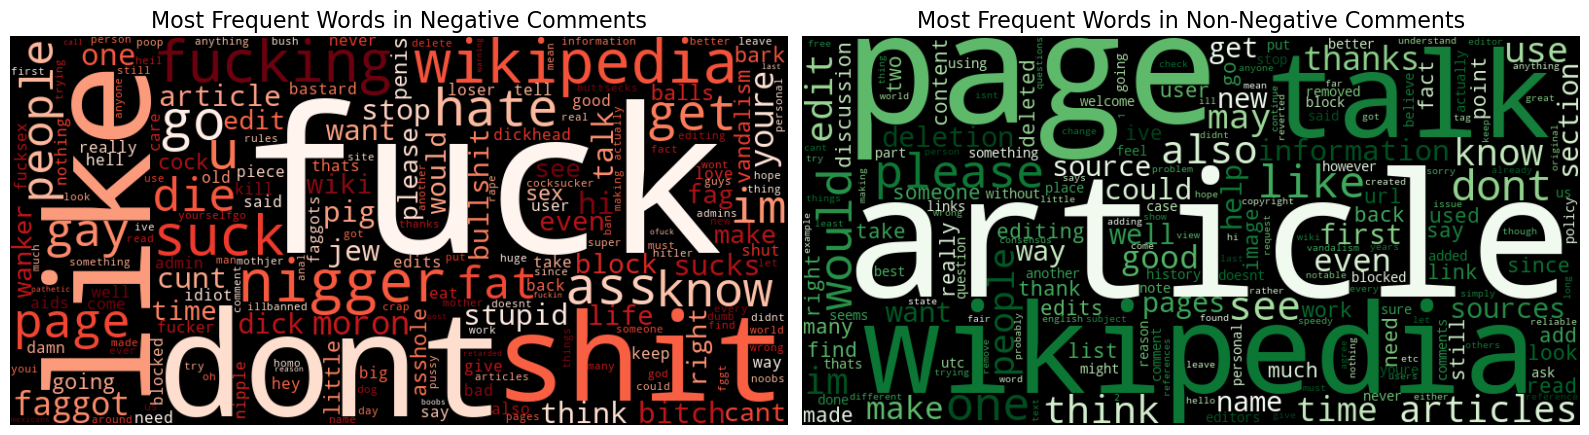

In [38]:
# Define negative comments
label_columns = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
train_data["negative_comment"] = train_data[label_columns].max(axis=1)

# Split into negative and non-negative groups
negative_comments = train_data[train_data["negative_comment"] == 1].copy()
non_negative_comments = train_data[train_data["negative_comment"] == 0].copy()

# Apply preprocessing
negative_comments["cleaned_comment"] = negative_comments["cleaned_comment"].apply(preprocess_negative_comments)
non_negative_comments["cleaned_comment"] = non_negative_comments["cleaned_comment"].apply(preprocess_negative_comments)

# Combine all cleaned comments into a single string for each category
negative_text = " ".join(negative_comments["cleaned_comment"].dropna())
non_negative_text = " ".join(non_negative_comments["cleaned_comment"].dropna())

# Count word frequencies
negative_word_counts = Counter(negative_text.split())
non_negative_word_counts = Counter(non_negative_text.split())

# Debug
print("Top 20 words in negative comments:", negative_word_counts.most_common(20))
print("Top 20 words in non-negative comments:", non_negative_word_counts.most_common(20))

# Generate word clouds from frequencies
wordcloud_negative = WordCloud(
    width=800, height=400, background_color="black", colormap="Reds"
).generate_from_frequencies(negative_word_counts)

wordcloud_non_negative = WordCloud(
    width=800, height=400, background_color="black", colormap="Greens"
).generate_from_frequencies(non_negative_word_counts)

# Plot Word Clouds
plt.figure(figsize=(16, 8))

# Negative comments word cloud
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Negative Comments", fontsize=16)

# Non-negative comments word cloud
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_negative, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Non-Negative Comments", fontsize=16)

plt.tight_layout()
plt.show()



Label Distribution:
toxic            15294
obscene           8449
insult            7877
severe_toxic      1595
identity_hate     1405
threat             478
dtype: int64


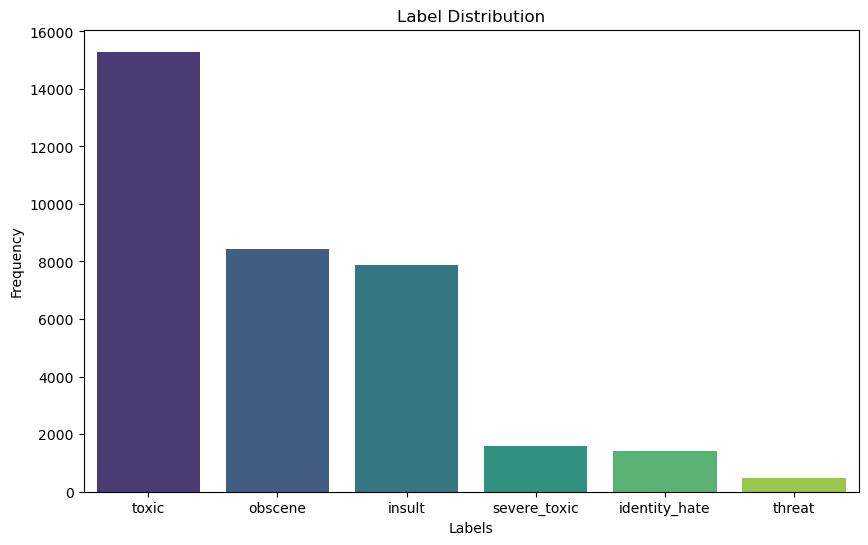

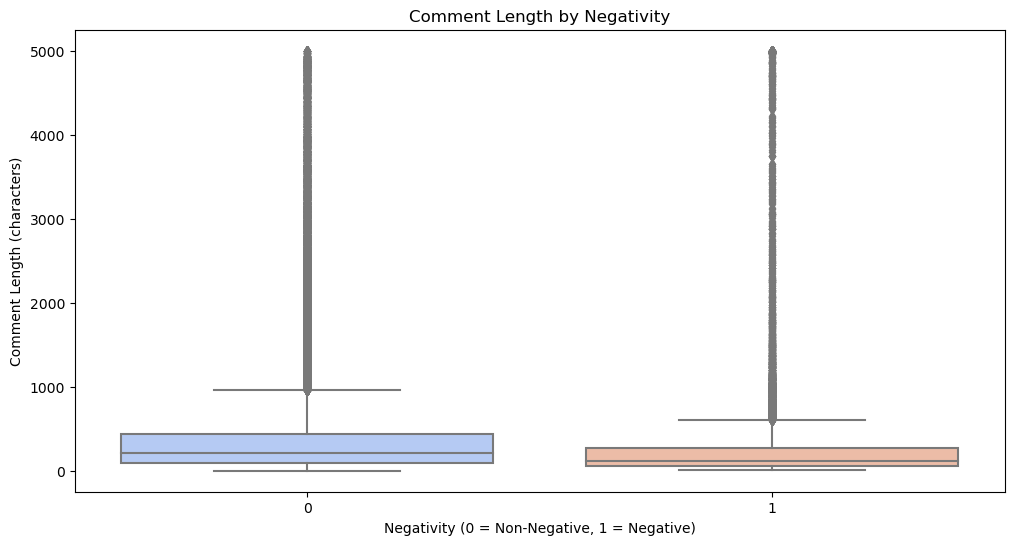

In [33]:
# Label distribution
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
label_distribution = train_data[label_cols].sum().sort_values(ascending=False)
print("\nLabel Distribution:")
print(label_distribution)

# Visualize label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title("Label Distribution")
plt.ylabel("Frequency")
plt.xlabel("Labels")
plt.show()

# Relationship between labels and comment lengths
plt.figure(figsize=(12, 6))
sns.boxplot(data=train_data, x='negative_comment', y='cleaned_length', palette="coolwarm")
plt.title("Comment Length by Negativity")
plt.xlabel("Negativity (0 = Non-Negative, 1 = Negative)")
plt.ylabel("Comment Length (characters)")
plt.show()


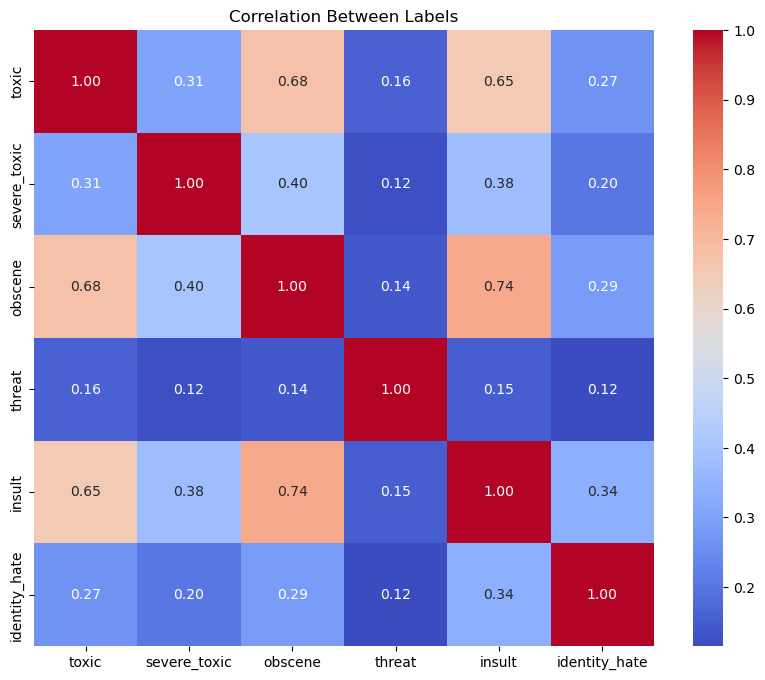

In [34]:
# Compute correlations
label_corr = train_data[label_cols].corr()

# Heatmap for label correlations
plt.figure(figsize=(10, 8))
sns.heatmap(label_corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Labels")
plt.show()


In [35]:
# Extremely short comments
short_comments = train_data[train_data['cleaned_length'] < 10]
print("\nExamples of very short comments:")
print(short_comments[['cleaned_comment', 'toxic', 'obscene', 'insult']].head())

# Extremely long comments
long_comments = train_data[train_data['cleaned_length'] > 500]
print("\nExamples of very long comments:")
print(long_comments[['cleaned_comment', 'toxic', 'obscene', 'insult']].head())



Examples of very short comments:
      cleaned_comment  toxic  obscene  insult
19815          (<URL>      0        0       0
27719       see <URL>      0        0       0
41648       [ ] <URL>      0        0       0
52442          14:53,      0        0       0
64904           <URL>      0        0       0

Examples of very long comments:
                                      cleaned_comment  toxic  obscene  insult
3   " more i can't make any real suggestions on im...      0        0       0
10  " fair use rationale for image:wonju.jpg thank...      0        0       0
13  before you start throwing accusations and warn...      0        0       0
15  " juelz santanas age in 2002, juelz santana wa...      0        0       0
24  " re-considering 1st paragraph edit? i don't u...      0        0       0


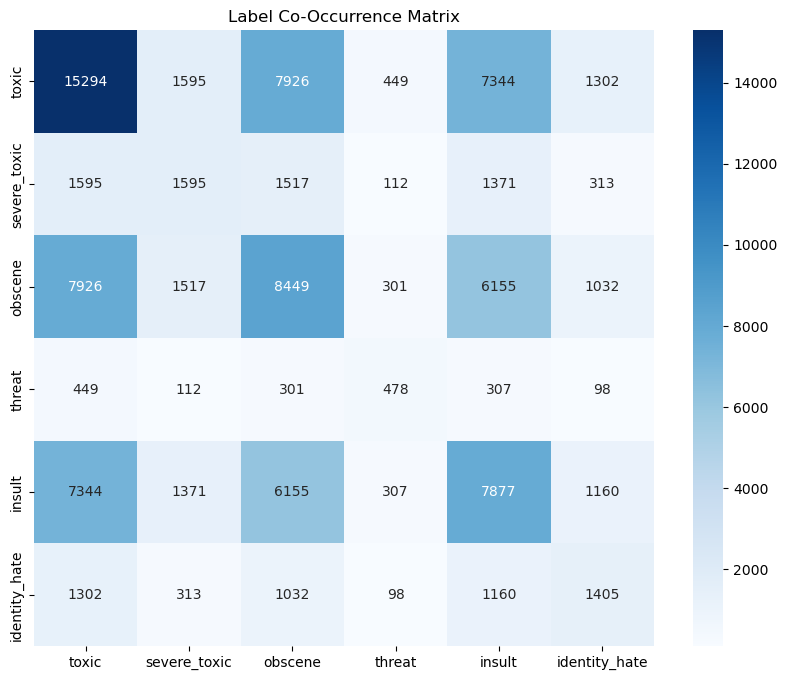

In [45]:
# Compute co-occurrence matrix
co_occurrence = train_data[label_columns].T.dot(train_data[label_columns])

# Normalize the matrix to get proportions (optional)
co_occurrence_normalized = co_occurrence / len(train_data)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(co_occurrence, annot=True, fmt="d", cmap="Blues")
plt.title("Label Co-Occurrence Matrix")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import re

def remove_consecutive_duplicates(text):
    """
    Remove consecutive duplicate words in a string to reduce spam.
    """
    return re.sub(r'\b(\w+)( \1\b)+', r'\1', text)

# Apply to comments
negative_comments["cleaned_comment"] = negative_comments["cleaned_comment"].apply(remove_consecutive_duplicates)
non_negative_comments["cleaned_comment"] = non_negative_comments["cleaned_comment"].apply(remove_consecutive_duplicates)

# Combine comments into a single string for each group
negative_text = " ".join(negative_comments["cleaned_comment"].dropna())
non_negative_text = " ".join(non_negative_comments["cleaned_comment"].dropna())

# Define a function to extract and visualize n-grams
def analyze_ngrams(text, n=2, top_n=20):

    # Initialize CountVectorizer for n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n), stop_words="english")
    ngrams_matrix = vectorizer.fit_transform([text])
    ngrams_counts = ngrams_matrix.toarray().flatten()
    
    # Create a DataFrame of n-grams and their counts
    ngrams_df = pd.DataFrame({
        "ngram": vectorizer.get_feature_names_out(),
        "count": ngrams_counts
    })
    ngrams_df = ngrams_df.sort_values(by="count", ascending=False).head(top_n)
    
    # Plot the top n-grams
    plt.figure(figsize=(12, 6))
    plt.barh(ngrams_df["ngram"], ngrams_df["count"], color="skyblue")
    plt.xlabel("Frequency")
    plt.title(f"Top {top_n} {n}-grams")
    plt.gca().invert_yaxis()  # Invert y-axis for descending order
    plt.show()

    return ngrams_df

# Print bi-grams and tri-grams
print("Negative Comments Bi-grams:")
negative_bigrams = analyze_ngrams(" ".join(negative_comments["cleaned_comment"].dropna()), n=2, top_n=20)

print("Negative Comments Tri-grams:")
negative_trigrams = analyze_ngrams(" ".join(negative_comments["cleaned_comment"].dropna()), n=3, top_n=20)

print("Non-Negative Comments Bi-grams:")
non_negative_bigrams = analyze_ngrams(non_negative_text, n=2, top_n=20)

print("Non-Negative Comments Tri-grams:")
non_negative_trigrams = analyze_ngrams(non_negative_text, n=3, top_n=20)




In [51]:
# Define a function to generate n-grams
def generate_ngrams(texts, n=2, top_k=10):
    """
    Generate top n-grams from a list of texts.
    Args:
        texts: List of strings (cleaned comments).
        n: The 'n' in n-grams (e.g., 2 for bigrams, 3 for trigrams).
        top_k: Number of top n-grams to return.
    Returns:
        List of top n-grams with their frequencies.
    """
    # Combine all texts into a single string
    combined_text = " ".join(texts)
    
    # Use CountVectorizer to generate n-grams
    vectorizer = CountVectorizer(ngram_range=(n, n))
    ngram_counts = vectorizer.fit_transform([combined_text])
    
    # Get n-gram counts
    ngram_freq = Counter(dict(zip(vectorizer.get_feature_names_out(), ngram_counts.toarray()[0])))
    
    # Return the top n-grams
    return ngram_freq.most_common(top_k)

# Analyze n-grams for each label
for label in label_columns:
    # Filter comments with the current label set to 1
    label_comments = train_data[train_data[label] == 1]["cleaned_comment"].dropna()
    
    # Generate bigrams and trigrams
    bigrams = generate_ngrams(label_comments, n=2, top_k=10)
    trigrams = generate_ngrams(label_comments, n=3, top_k=10)
    
    # Print results
    print(f"Label: {label}")
    print("Top 10 Bigrams:", bigrams)
    print("Top 10 Trigrams:", trigrams)
    print("-" * 50)


Label: toxic
Top 10 Bigrams: [('you are', 4325), ('fuck you', 3753), ('nigger nigger', 2015), ('in the', 1808), ('you re', 1766), ('you fuck', 1733), ('hate you', 1567), ('moron hi', 1475), ('of the', 1474), ('hi moron', 1472)]
Top 10 Trigrams: [('nigger nigger nigger', 2006), ('you fuck you', 1587), ('fuck you fuck', 1586), ('hi moron hi', 1468), ('moron hi moron', 1466), ('you hate you', 1429), ('hate you hate', 1412), ('pig pig pig', 1248), ('fat jew fat', 1226), ('jew fat jew', 1224)]
--------------------------------------------------
Label: severe_toxic
Top 10 Bigrams: [('fuck you', 3105), ('you fuck', 1584), ('you suck', 1031), ('shit shit', 1000), ('go fuck', 923), ('you are', 899), ('fuck yourself', 895), ('yourself go', 819), ('suck you', 728), ('faggot faggot', 712)]
Top 10 Trigrams: [('fuck you fuck', 1555), ('you fuck you', 1553), ('shit shit shit', 999), ('go fuck yourself', 890), ('fuck yourself go', 819), ('yourself go fuck', 818), ('suck you suck', 726), ('you suck you'